#5CS037 – Assignment I: Statistical Interpretation & EDA
# Original Notebook Code (Problem 1A – Problem 3)
# Dataset: Human_Development_Index_Dataset.csv
# Author: Dipti Giri

In [3]:
# -----------------------------
# Common Imports
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


# -----------------------------
# Load Dataset
# -----------------------------
# Load CSV with encoding fix (handles UnicodeDecodeError)
try:
   df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="utf-8")
except UnicodeDecodeError:
  df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")


# Basic inspection
print(df.shape)
df.head()

(6798, 30)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


# Problem 1A – Single Year HDI Exploration (2022)

In [4]:
# Task 1: Extract Latest Year (2022)
years = df['year'].unique()
print("Available years:", sorted(years))


hdi_2022_df = df[df['year'] == 2022].copy()
print(hdi_2022_df.shape)

Available years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
(206, 30)


In [5]:
# Task 2: Data Exploration
hdi_2022_df.head(10)


print("Rows, Columns:", hdi_2022_df.shape)
print("\nColumn info:")
print(hdi_2022_df.dtypes)

Rows, Columns: (206, 30)

Column info:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64

In [7]:
# Task 3: Missing Values & Cleaning
print("\nMissing values per column:")
print(hdi_2022_df.isna().sum())


# Replace special characters representing missing values
hdi_2022_df.replace("–", np.nan, inplace=True)


# Convert numeric columns safely
numeric_cols = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']
for col in numeric_cols:
  if col in hdi_2022_df.columns:
   hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')


# Remove duplicates
hdi_2022_df.drop_duplicates(inplace=True)


# Handle missing values (drop rows with missing HDI)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


Missing values per column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

In [8]:
# Task 4: Basic Statistics
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()


print("Mean HDI:", mean_hdi)
print("Median HDI:", median_hdi)
print("Std HDI:", std_hdi)


highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']


print("Highest HDI:", highest_hdi_country)
print("Lowest HDI:", lowest_hdi_country)

Mean HDI: 0.7228872549019609
Median HDI: 0.7395
Std HDI: 0.15302880386427825
Highest HDI: Switzerland
Lowest HDI: Somalia


In [10]:
# Task 5: Filtering and Sorting
# Some datasets use slightly different column names for GNI
print("Available columns:", hdi_2022_df.columns)


# Find correct GNI column name safely
gni_col = None
for col in hdi_2022_df.columns:
  if 'gross' in col.lower() and 'inc' in col.lower():
   gni_col = col
   break


print("Using GNI column:", gni_col)


high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_sorted = high_hdi.sort_values(by=gni_col, ascending=False)


high_hdi_sorted.head(10)

Available columns: Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')
Using GNI column: gross_inc_percap


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [18]:
# Task 6: HDI Category Column


def classify_hdi(hdi_value: float) -> str:
    """
    Classify a country into UNDP HDI categories based on 2022 HDI value.
    """
    if pd.isna(hdi_value):
        return np.nan
    if hdi_value < 0.550:
        return "Low"
    elif 0.550 <= hdi_value <= 0.699:
        return "Medium"
    elif 0.700 <= hdi_value <= 0.799:
        return "High"
    else:  # hdi_value >= 0.800
        return "Very"

hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(classify_hdi)

# Verification 1: show category counts
print("HDI_Category counts:")
display(hdi_2022_df["HDI_Category"].value_counts(dropna=False))

# Verification 2: check boundary values are classified correctly
boundary_check = hdi_2022_df[
    (hdi_2022_df["hdi"].between(0.545, 0.555)) |
    (hdi_2022_df["hdi"].between(0.695, 0.705)) |
    (hdi_2022_df["hdi"].between(0.795, 0.805))
].copy()

print("Boundary classification check (values near 0.550, 0.700, 0.800):")
display(boundary_check[["country", "hdi", "HDI_Category"]].sort_values("hdi"))

# Verification 3: confirm new column exists in dataframe
print("New column added?", "HDI_Category" in hdi_2022_df.columns)

# Save final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("Saved file: HDI_category_added.csv")

HDI_Category counts:


,count
HDI_Category,
Very,71
High,54
Medium,44
Low,35


Boundary classification check (values near 0.550, 0.700, 0.800):


,country,hdi,HDI_Category
5807,Togo,0.547,Low
4817,Rwanda,0.548,Low
4256,Nigeria,0.548,Low
6764,Sub-Saharan Africa,0.549,Low
6038,Uganda,0.550,Medium
6434,Zimbabwe,0.550,Medium
2408,Haiti,0.552,Medium
4058,Nauru,0.696,Medium
3926,Morocco,0.698,Medium
692,Bolivia (Plurinational State of),0.698,Medium


New column added? True
Saved file: HDI_category_added.csv


#Problem 1B – HDI Visualization & Trend Analysis (2020–2022)

In [20]:
# -----------------------------
# Task 1: Data Extraction and Saving
# -----------------------------
# Filter dataset for years 2020, 2021, and 2022
hdi_problem1B_df = df[df["year"].isin([2020, 2021, 2022])].copy()

# Intermediate verification output
print("Filtered years present in the dataset:")
print(sorted(hdi_problem1B_df["year"].unique()))

print("Shape of filtered dataset (2020–2022):", hdi_problem1B_df.shape)
display(hdi_problem1B_df.head())

# Save the filtered dataset
hdi_problem1B_df.to_csv("HDI_problem1B.csv", index=False)
print("Saved file: HDI_problem1B.csv")

Filtered years present in the dataset:
[np.int64(2020), np.int64(2021), np.int64(2022)]
Shape of filtered dataset (2020–2022): (618, 30)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


Saved file: HDI_problem1B.csv


In [22]:
# Task 2: Data Cleaning (STEP-BY-STEP OUTPUT)
# -----------------------------
# Convert numeric columns safely
numeric_cols = ['hdi', 'year', 'gross inc percap', 'life expectancy', 'gender development']
for col in numeric_cols:
  if col in hdi_1b.columns:
   hdi_1b[col] = pd.to_numeric(hdi_1b[col], errors='coerce')


print("Missing values after conversion:\n")
print(hdi_1b[['hdi','year']].isna().sum())


# Drop rows with missing essential values
before_rows = hdi_1b.shape[0]
hdi_1b.dropna(subset=['hdi', 'country', 'year'], inplace=True)
after_rows = hdi_1b.shape[0]


print(f"Rows before cleaning: {before_rows}")
print(f"Rows after cleaning: {after_rows}")


# Remove duplicates
hdi_1b.drop_duplicates(inplace=True)


# Standardize country names
hdi_1b['country'] = hdi_1b['country'].str.strip()


print("Task 2 Output: Cleaned Data Preview")
hdi_1b[['country','year','hdi']].head(10)
# Save cleaned dataset
hdi_1b.to_csv("HDI_problem1B.csv", index=False)
print("File saved: HDI_problem1B.csv")

Missing values after conversion:

hdi     0
year    0
dtype: int64
Rows before cleaning: 610
Rows after cleaning: 610
Task 2 Output: Cleaned Data Preview
File saved: HDI_problem1B.csv


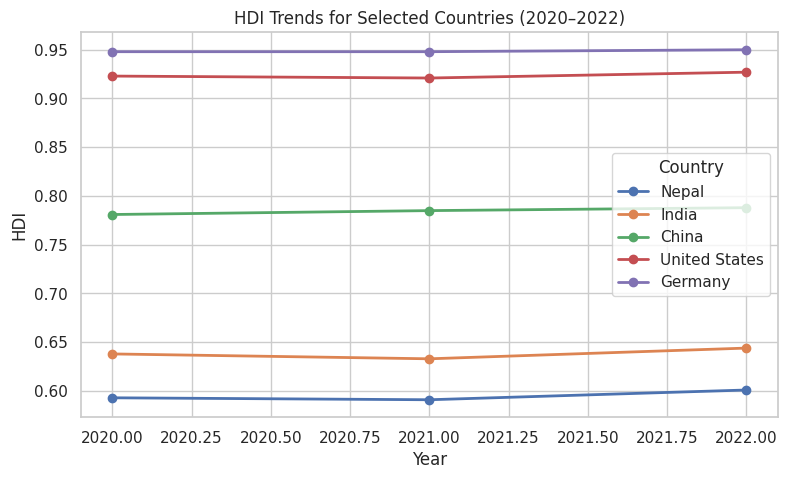

In [24]:
# -----------------------------
# Task 3: Visualizations (CLEAR & EXAM-FRIENDLY)
# -----------------------------


# Task 3A: Line Chart – HDI Trend (Country-Level)
selected_countries = ['Nepal', 'India', 'China', 'United States', 'Germany']
line_df = hdi_1b[hdi_1b['country'].isin(selected_countries)]


plt.figure(figsize=(9,5))
for c in selected_countries:
  temp = line_df[line_df['country'] == c]
  plt.plot(temp['year'], temp['hdi'], marker='o', linewidth=2, label=c)


plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend(title="Country")
plt.grid(True)
plt.show()

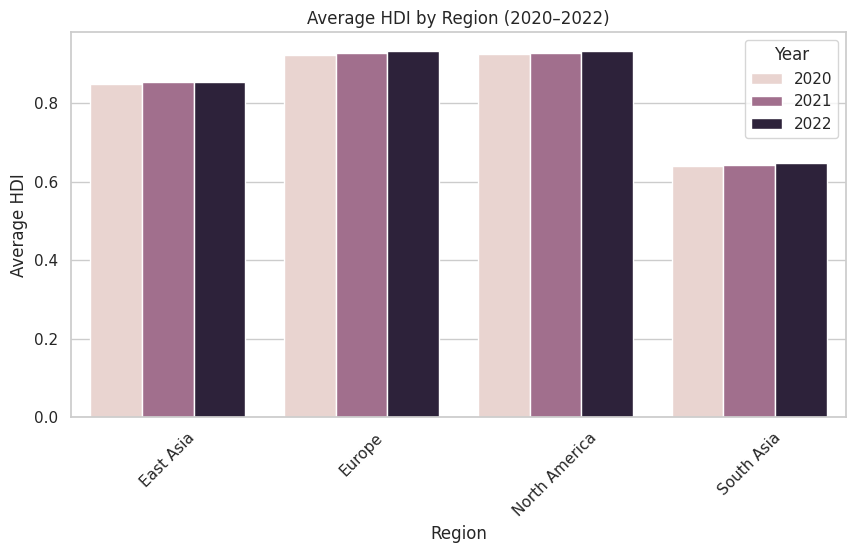

In [33]:
# Task 3B: Bar Chart – Average HDI by Region
region_avg = hdi_1b.groupby(['region', 'year'])['hdi'].mean().reset_index()


plt.figure(figsize=(10,5))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.legend(title="Year")
plt.show()




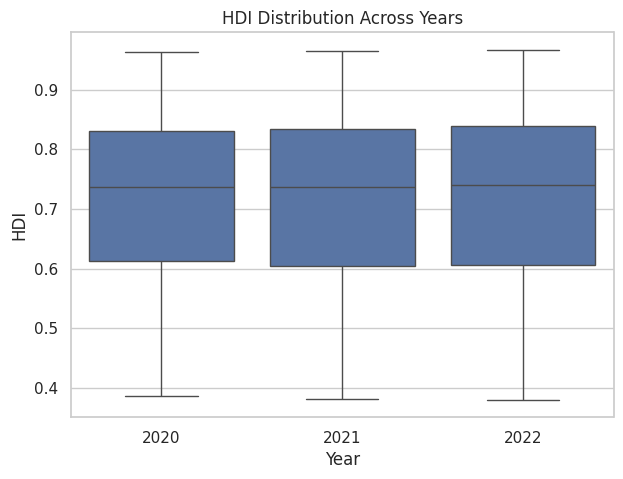

In [34]:
# Task 3C: Box Plot – HDI Distribution by Year
plt.figure(figsize=(7,5))
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution Across Years")
plt.show()

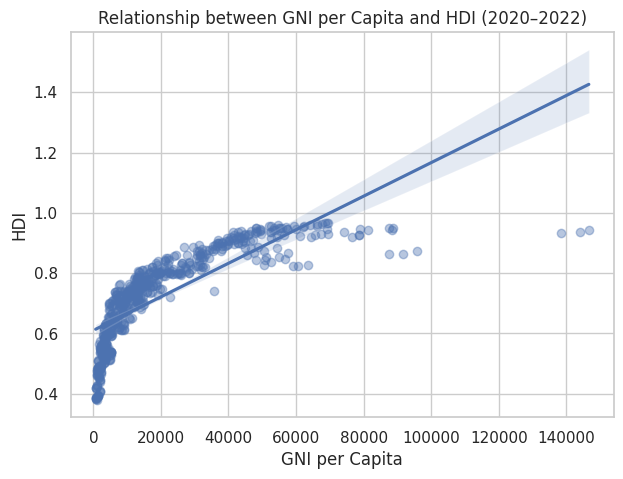

In [35]:
# Task 3D: Scatter Plot – HDI vs GNI per Capita
# Detect correct GNI column dynamically
gni_col = None
for col in hdi_1b.columns:
  if 'gross' in col.lower() and 'inc' in col.lower():
      gni_col = col
      break


if gni_col:
  plt.figure(figsize=(7,5))
  sns.regplot(data=hdi_1b, x=gni_col, y='hdi', scatter_kws={'alpha':0.4})
  plt.xlabel("GNI per Capita")
  plt.ylabel("HDI")
  plt.title("Relationship between GNI per Capita and HDI (2020–2022)")
  plt.show()
else:
  print("GNI per Capita variable not available in the dataset.")

In [37]:
#Task4- Short Analysis Questions:
#compute HDI change(2020-2022)
# Pivot data to compare HDI across years
hdi_wide = (
    hdi_problem1B_df
    .pivot_table(index="country", columns="year", values="hdi", aggfunc="mean")
)

# Keep only countries with values in both 2020 and 2022
hdi_wide = hdi_wide.dropna(subset=[2020, 2022])

# Compute HDI change
hdi_wide["HDI_change_2020_2022"] = hdi_wide[2022] - hdi_wide[2020]

display(hdi_wide.head(10))


year,2020,2021,2022,HDI_change_2020_2022
country,,,,
Afghanistan,0.488,0.473,0.462,-0.026
Albania,0.784,0.785,0.789,0.005
Algeria,0.730,0.740,0.745,0.015
Andorra,0.843,0.855,0.884,0.041
Angola,0.594,0.590,0.591,-0.003
Antigua and Barbuda,0.820,0.819,0.826,0.006
Arab States,0.704,0.704,0.704,0.000
Argentina,0.841,0.844,0.849,0.008
Armenia,0.769,0.774,0.786,0.017


In [38]:
#Which countries show the greatest improvement in HDI from 2020 to 2022?
# Find the maximum improvement
max_improvement = hdi_wide["HDI_change_2020_2022"].max()

print("Maximum HDI improvement (2020 → 2022):", max_improvement)

# Countries with the greatest improvement
greatest_improvers = hdi_wide[
    hdi_wide["HDI_change_2020_2022"] == max_improvement
]

display(greatest_improvers[[2020, 2022, "HDI_change_2020_2022"]])



Maximum HDI improvement (2020 → 2022): 0.041000000000000036


year,2020,2022,HDI_change_2020_2022
country,,,
Andorra,0.843,0.884,0.041


In [39]:
#Did any countries experience a decline in HDI? Provide possible reasons.
# Identify countries with HDI decline (2020 → 2022)
decline_countries = hdi_wide[hdi_wide["HDI_change_2020_2022"] < 0]

print("Countries that experienced a decline in HDI (2020 → 2022):")

if decline_countries.empty:
    print("No countries experienced a decline in HDI between 2020 and 2022.")
else:
    display(
        decline_countries
        .sort_values("HDI_change_2020_2022")
        [[2020, 2022, "HDI_change_2020_2022"]]
    )


Countries that experienced a decline in HDI (2020 → 2022):


year,2020,2022,HDI_change_2020_2022
country,,,
Timor-Leste,0.633,0.566,-0.067
Ukraine,0.762,0.734,-0.028
Afghanistan,0.488,0.462,-0.026
Namibia,0.634,0.610,-0.024
Lebanon,0.742,0.723,-0.019
Saint Vincent and the Grenadines,0.785,0.772,-0.013
Suriname,0.702,0.690,-0.012
Eswatini (Kingdom of),0.622,0.610,-0.012
Gabon,0.704,0.693,-0.011


In [40]:
#Which region has the highest and lowest average HDI across these three years?
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Adding region column
hdi_problem1B_df["region"] = hdi_problem1B_df["country"].apply(
    lambda x: "South Asia" if x in south_asia
    else "Middle East" if x in middle_east
    else None
)

#Compute average HDI by region (2020–2022)
region_avg = (
    hdi_problem1B_df
    .dropna(subset=["region"])
    .groupby("region")["hdi"]
    .mean()
    .sort_values(ascending=False)
)

print("Average HDI by region (2020–2022):")
display(region_avg)

Average HDI by region (2020–2022):


,hdi
region,
Middle East,0.788909
South Asia,0.639583


Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

Global events like the COVID-19 pandemic significantly affected HDI trends between 2020 and 2022. In 2020 and 2021, many countries saw slow growth or declines in HDI because of higher death rates, economic slowdown, job losses, and interruptions in education and healthcare systems. The slight improvement in 2022 indicates gradual economic recovery, better healthcare management, and government policies supporting social and economic development.

#Problem 2 – Advanced HDI Exploration (South Asia)

In [41]:
# -----------------------------
# Task 1: Create South Asia Subset
# -----------------------------

south_asia = [
    'Afghanistan','Bangladesh','Bhutan','India',
    'Maldives','Nepal','Pakistan','Sri Lanka'
]

sa_df = df[df['country'].isin(south_asia)].copy()

# Replace special missing symbol
sa_df.replace("–", np.nan, inplace=True)

# Convert required numeric columns
for col in ['hdi', 'life expectancy', 'gross inc percap', 'gender development']:
    if col in sa_df.columns:
        sa_df[col] = pd.to_numeric(sa_df[col], errors='coerce')

# Drop rows with missing HDI
sa_df.dropna(subset=['hdi'], inplace=True)

# -----------------------------
# SHOW OUTPUT (THIS WAS MISSING)
# -----------------------------
print("South Asia dataset preview:")
display(sa_df.head())

print("\nDataset shape:", sa_df.shape)

# Save South Asia dataset
sa_df.to_csv("HDI_SouthAsia.csv", index=False)


South Asia dataset preview:


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948



Dataset shape: (239, 30)


In [47]:
# -----------------------------
# Task 2: Composite Development Score
# -----------------------------
# Work on a copy to avoid modifying original dataframe
south_asia = hdi_south_asia_df.copy()

# Min–max normalization for Life Expectancy
south_asia["life_expectancy_index"] = (
    (south_asia["life_expectancy"] - south_asia["life_expectancy"].min()) /
    (south_asia["life_expectancy"].max() - south_asia["life_expectancy"].min())
)

# Min–max normalization for GNI per Capita
south_asia["gni_index"] = (
    (south_asia["gross_inc_percap"] - south_asia["gross_inc_percap"].min()) /
    (south_asia["gross_inc_percap"].max() - south_asia["gross_inc_percap"].min())
)

# Compute Composite Development Score
south_asia["Composite_Score"] = (
    0.30 * south_asia["life_expectancy_index"] +
    0.30 * south_asia["gni_index"]
)

display(south_asia[[
    "country",
    "life_expectancy",
    "gross_inc_percap",
    "Composite_Score"
]].head(10))


,country,life_expectancy,gross_inc_percap,Composite_Score
0,Afghanistan,45.967,3115.670448,0.035843
1,Afghanistan,46.663,2817.304736,0.036821
2,Afghanistan,47.596,2474.681985,0.039094
3,Afghanistan,51.466,1723.019763,0.059765
4,Afghanistan,51.495,1202.010488,0.051266
5,Afghanistan,52.544,1477.061709,0.064909
6,Afghanistan,53.243,1468.355839,0.070776
7,Afghanistan,53.634,1338.724144,0.071963
8,Afghanistan,52.943,1227.293565,0.064147
9,Afghanistan,54.846,1122.322570,0.078756


In [48]:
# Rank countries
composite_rank = (
    south_asia
    .sort_values("Composite_Score", ascending=False)
    [["country", "Composite_Score", "hdi"]]
)

display(composite_rank)


,country,Composite_Score,hdi
3530,Maldives,0.600000,0.762
3527,Maldives,0.590978,0.753
3526,Maldives,0.579610,0.747
3525,Maldives,0.569251,0.740
3524,Maldives,0.559183,0.734
...,...,...,...
3,Afghanistan,0.059765,0.307
4,Afghanistan,0.051266,0.300
2,Afghanistan,0.039094,0.299
1,Afghanistan,0.036821,0.292


,country,Composite_Score,hdi
3530,Maldives,0.600000,0.762
5477,Sri Lanka,0.446959,0.780
659,Bhutan,0.387867,0.681
461,Bangladesh,0.331426,0.670
2573,India,0.287583,0.644
4091,Nepal,0.262039,0.601
4388,Pakistan,0.249819,0.540
32,Afghanistan,0.151438,0.462


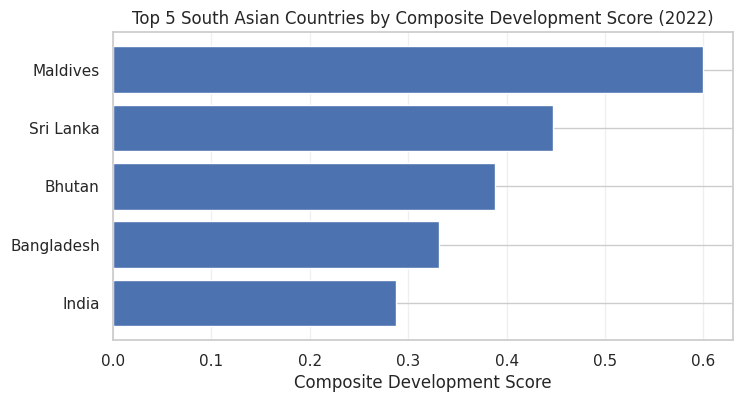

In [49]:
# Plot Top 5 countries
# Use 2022 data only to avoid duplicate country entries
south_asia_2022 = south_asia[south_asia["year"] == 2022].copy()

# Rank countries by Composite Score
composite_rank = (
    south_asia_2022
    .sort_values("Composite_Score", ascending=False)
    [["country", "Composite_Score", "hdi"]]
)

display(composite_rank)

# Plot top 5 countries
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8, 4))
plt.barh(
    top5_composite["country"],
    top5_composite["Composite_Score"]
)
plt.xlabel("Composite Development Score")
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()

In [54]:
# -----------------------------
# Outlier detection using IQR method
#Task 3
# -----------------------------

def iqr_outlier_flags(data_col):
    q1 = data_col.quantile(0.25)
    q3 = data_col.quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    return data_col.apply(lambda x: x < min_val or x > max_val)

# -----------------------------
# Apply outlier detection
# -----------------------------

south_asia = south_asia.copy()

south_asia["HDI_outlier"] = iqr_outlier_flags(south_asia["hdi"])
south_asia["GNI_outlier"] = iqr_outlier_flags(south_asia["gross_inc_percap"])

# Final outlier flag
south_asia["Outlier"] = south_asia[["HDI_outlier", "GNI_outlier"]].any(axis=1)

# -----------------------------
# Display results
# -----------------------------

print("Identified outlier countries:")
display(
    south_asia.loc[south_asia["Outlier"],
    ["country", "hdi", "gross_inc_percap", "HDI_outlier", "GNI_outlier"]]
)




Identified outlier countries:


,country,hdi,gross_inc_percap,HDI_outlier,GNI_outlier
3511,Maldives,0.655,14543.14634,False,True
3512,Maldives,0.656,15287.20714,False,True
3514,Maldives,0.670,16391.40757,False,True
3515,Maldives,0.670,14162.42816,False,True
3516,Maldives,0.682,15423.81910,False,True
3517,Maldives,0.684,14050.92438,False,True
3518,Maldives,0.692,14363.23615,False,True
3519,Maldives,0.701,15300.31364,False,True
3520,Maldives,0.708,15355.44089,False,True
3521,Maldives,0.715,15648.36655,False,True


SCATTER PLOT

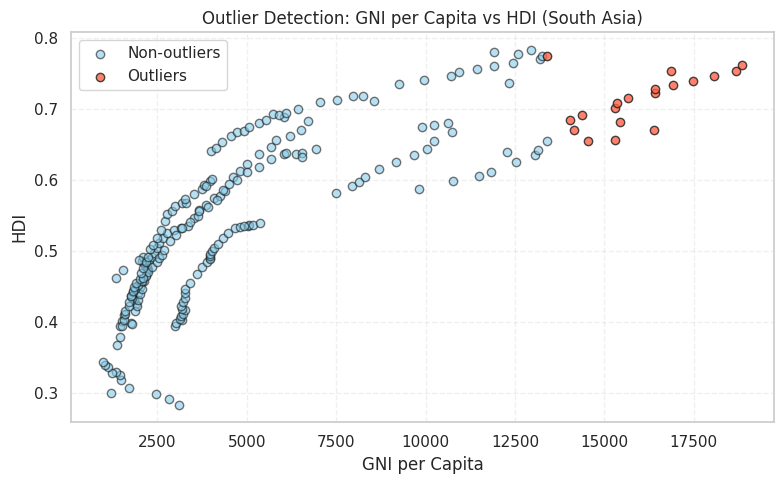

In [55]:
import matplotlib.pyplot as plt

# -----------------------------
# Outlier Visualization: HDI vs GNI
# -----------------------------

plt.figure(figsize=(8, 5))

# Separate data for clarity
non_outliers = south_asia.loc[~south_asia["Outlier"]]
outliers = south_asia.loc[south_asia["Outlier"]]

# Plot non-outliers
plt.scatter(
    non_outliers["gross_inc_percap"],
    non_outliers["hdi"],
    c='skyblue',
    edgecolor='k',
    alpha=0.6,
    label='Non-outliers'
)

# Plot outliers
plt.scatter(
    outliers["gross_inc_percap"],
    outliers["hdi"],
    c='tomato',
    edgecolor='k',
    alpha=0.8,
    label='Outliers'
)

# Labels and title
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: GNI per Capita vs HDI (South Asia)")
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [57]:
# -----------------------------
# Task 4: Metric Relationships
# -----------------------------
# Keep only relevant columns and remove rows with NaN
cols_to_use = ["hdi", "gender_development", "life_expectancy"]
metrics = south_asia[cols_to_use].copy().dropna()

# Compute correlations with HDI
corr_results = {}
for col in ["gender_development", "life_expectancy"]:
    corr_results[col] = metrics["hdi"].corr(metrics[col])

# Display results
print("Pearson Correlation of HDI with other metrics:")
for key, val in corr_results.items():
    print(f"{key.replace('_',' ').title()} vs HDI: {val:.3f}")


Pearson Correlation of HDI with other metrics:
Gender Development vs HDI: 0.866
Life Expectancy vs HDI: 0.949


Scatter plot: HDI vs Gender Development Index

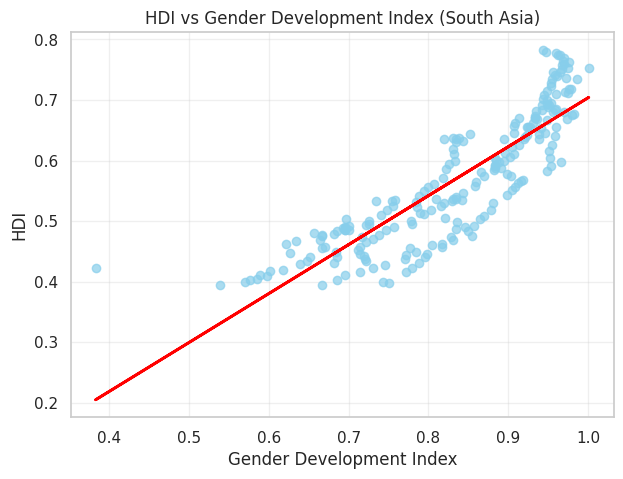

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: HDI vs Gender Development Index
plt.figure(figsize=(7,5))
plt.scatter(metrics["gender_development"], metrics["hdi"], color='skyblue', alpha=0.7)

# Linear trendline
slope, intercept = np.polyfit(metrics["gender_development"], metrics["hdi"], 1)
plt.plot(
    metrics["gender_development"],
    slope * metrics["gender_development"] + intercept,
    color='red',
    linewidth=2
)

# Labels and title
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.grid(True, alpha=0.3)
plt.show()


Scatter plot: HDI vs Life Expectancy

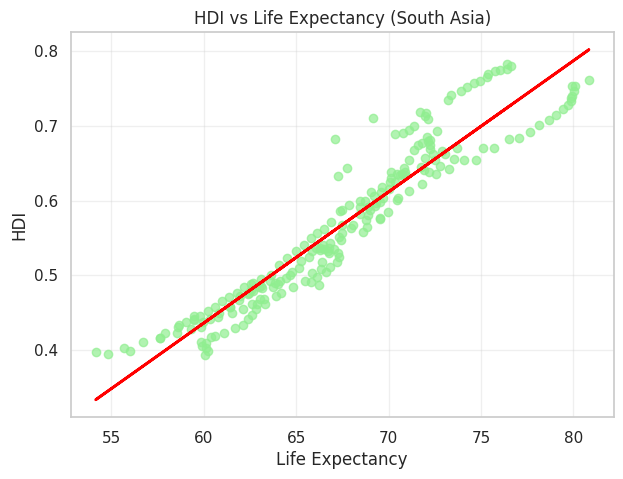

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: HDI vs Life Expectancy
plt.figure(figsize=(7,5))
plt.scatter(metrics["life_expectancy"], metrics["hdi"], color='lightgreen', alpha=0.7)

# Linear trendline
slope, intercept = np.polyfit(metrics["life_expectancy"], metrics["hdi"], 1)
plt.plot(
    metrics["life_expectancy"],
    slope * metrics["life_expectancy"] + intercept,
    color='red',
    linewidth=2
)

# Labels and title
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.grid(True, alpha=0.3)
plt.show()


Task 5: GNI vs HDI Gap Analysis (2022)


Top positive GNI–HDI gaps:


,country,GNI_HDI_Gap,gross_inc_percap,hdi
3530,Maldives,18846.030190,18846.792190,0.762
5477,Sri Lanka,11898.718470,11899.498470,0.780
659,Bhutan,10624.192880,10624.873880,0.681
2573,India,6949.882798,6950.526798,0.644
461,Bangladesh,6510.452178,6511.122178,0.670
4388,Pakistan,5373.730423,5374.270423,0.540
4091,Nepal,4024.953685,4025.554685,0.601
32,Afghanistan,1334.743733,1335.205733,0.462



Top negative GNI–HDI gaps:


,country,GNI_HDI_Gap,gross_inc_percap,hdi
32,Afghanistan,1334.743733,1335.205733,0.462
4091,Nepal,4024.953685,4025.554685,0.601
4388,Pakistan,5373.730423,5374.270423,0.540
461,Bangladesh,6510.452178,6511.122178,0.670
2573,India,6949.882798,6950.526798,0.644
659,Bhutan,10624.192880,10624.873880,0.681
5477,Sri Lanka,11898.718470,11899.498470,0.780
3530,Maldives,18846.030190,18846.792190,0.762


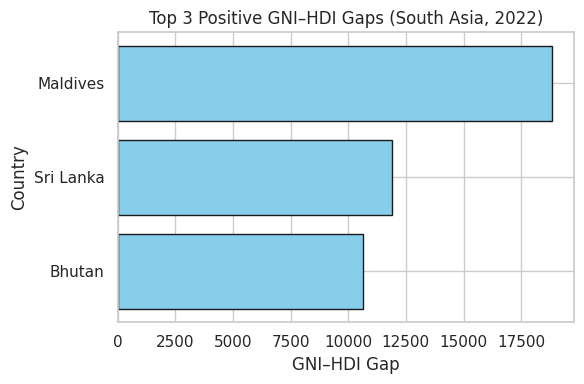

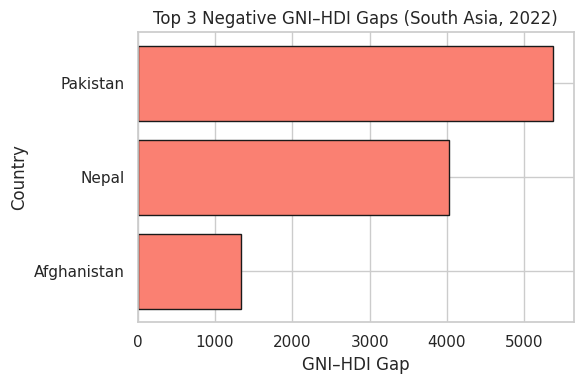

In [60]:
#Task 5- Gap Analysis
import matplotlib.pyplot as plt


# Define South Asia countries
sa_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Subset for 2022
sa_data_2022 = df[(df["country"].isin(sa_countries)) & (df["year"] == 2022)].copy()

# Check if required columns exist
required_cols = ["gross_inc_percap", "hdi"]
if all(col in sa_data_2022.columns for col in required_cols):

    # Compute GNI–HDI gap
    sa_data_2022["GNI_HDI_Gap"] = sa_data_2022["gross_inc_percap"] - sa_data_2022["hdi"]

    # Rank countries by gap
    top_positive = sa_data_2022.nlargest(8, "GNI_HDI_Gap")[["country", "GNI_HDI_Gap", "gross_inc_percap", "hdi"]]
    top_negative = sa_data_2022.nsmallest(8, "GNI_HDI_Gap")[["country", "GNI_HDI_Gap", "gross_inc_percap", "hdi"]]

    # Display results
    print("\nTop positive GNI–HDI gaps:")
    display(top_positive)

    print("\nTop negative GNI–HDI gaps:")
    display(top_negative)

    # Plot top 3 positive gaps
    plt.figure(figsize=(6,4))
    top_pos_plot = top_positive.head(3).sort_values("GNI_HDI_Gap")
    plt.barh(top_pos_plot["country"], top_pos_plot["GNI_HDI_Gap"], color='skyblue', edgecolor='k')
    plt.title("Top 3 Positive GNI–HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI–HDI Gap")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

    # Plot top 3 negative gaps
    plt.figure(figsize=(6,4))
    top_neg_plot = top_negative.head(3).sort_values("GNI_HDI_Gap")
    plt.barh(top_neg_plot["country"], top_neg_plot["GNI_HDI_Gap"], color='salmon', edgecolor='k')
    plt.title("Top 3 Negative GNI–HDI Gaps (South Asia, 2022)")
    plt.xlabel("GNI–HDI Gap")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

else:
    print("\nRequired columns for GNI–HDI gap analysis are missing.")


Discuss the implications of the gap, e.g., cases where GNI is high but HDI
is lower than expected.

The GNI–HDI gap shows the difference between a country’s income and its actual human development results.
A positive gap means a country has relatively high income, but this wealth has not fully improved health, education, or overall well-being. This could happen due to unequal income distribution, low public investment in social sectors, or structural development challenges.
A negative gap indicates that some countries achieve better human development outcomes even with lower income, suggesting more efficient social policies and effective use of resources.

#Problem 3 – Task 1: Regional Subset Creation

In [63]:
# -----------------------------
# Task 1: Create Regional Subsets
# -----------------------------
# Regional subsets
south_asia = ['Afghanistan','Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka']
middle_east = ['Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Palestine','Qatar','Saudi Arabia','Syria','United Arab Emirates','Yemen']

sa_3 = hdi_1b[hdi_1b['country'].isin(south_asia)]
me_3 = hdi_1b[hdi_1b['country'].isin(middle_east)]

# Save CSVs
sa_3.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_3.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

# Quick preview
display(sa_3.head())
display(me_3.head())


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,NaN
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,NaN
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,NaN
459,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993,South Asia
460,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834,South Asia


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
426,427,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,...,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735,NaN
427,428,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,...,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832,NaN
428,429,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,...,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063,NaN
2670,2671,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,...,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825,NaN
2671,2672,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,...,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368,NaN


In [64]:
# -----------------------------
# Task 2: Descriptive Statistics
# -----------------------------
sa_mean = sa_3['hdi'].mean()
sa_std = sa_3['hdi'].std()


me_mean = me_3['hdi'].mean()
me_std = me_3['hdi'].std()


print("South Asia – Mean HDI:", sa_mean)
print("South Asia – Std HDI:", sa_std)
print("Middle East – Mean HDI:", me_mean)
print("Middle East – Std HDI:", me_std)

South Asia – Mean HDI: 0.6395833333333333
South Asia – Std HDI: 0.09827331747496995
Middle East – Mean HDI: 0.7889090909090909
Middle East – Std HDI: 0.14129476362297624


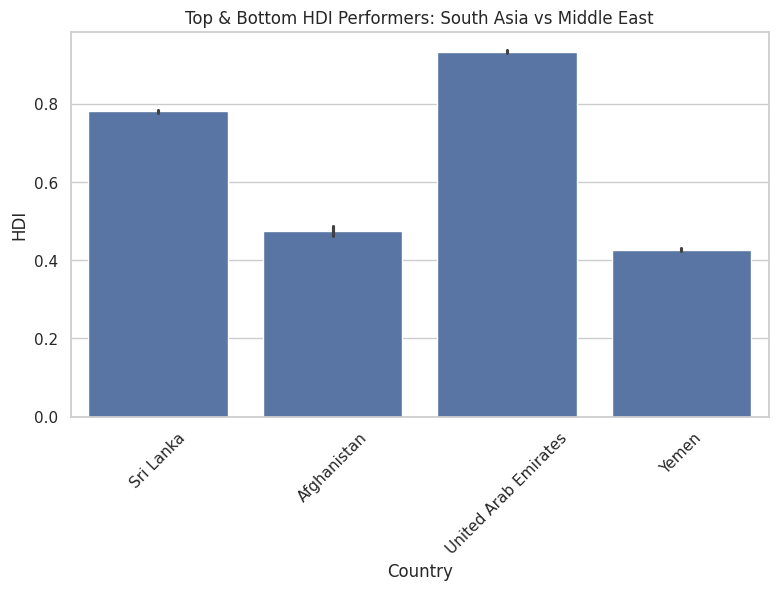

In [65]:
# -----------------------------
# Task 3: Top & Bottom Performers
# -----------------------------
sa_top3 = sa_3.sort_values(by='hdi', ascending=False).head(3)
sa_bottom3 = sa_3.sort_values(by='hdi').head(3)


me_top3 = me_3.sort_values(by='hdi', ascending=False).head(3)
me_bottom3 = me_3.sort_values(by='hdi').head(3)


performers_df = pd.concat([sa_top3, sa_bottom3, me_top3, me_bottom3])


plt.figure(figsize=(9,5))
sns.barplot(data=performers_df, x='country', y='hdi')
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.xlabel("Country")
plt.ylabel("HDI")
plt.xticks(rotation=45)
plt.show()

,region,year,gender_development
0,Middle East,2020,0.938625
1,Middle East,2021,0.934250
2,Middle East,2022,0.934750
3,South Asia,2020,0.884000
4,South Asia,2021,0.882400
5,South Asia,2022,0.886400


region,Middle East,South Asia
year,,
2020,0.938625,0.8840
2021,0.934250,0.8824
2022,0.934750,0.8864


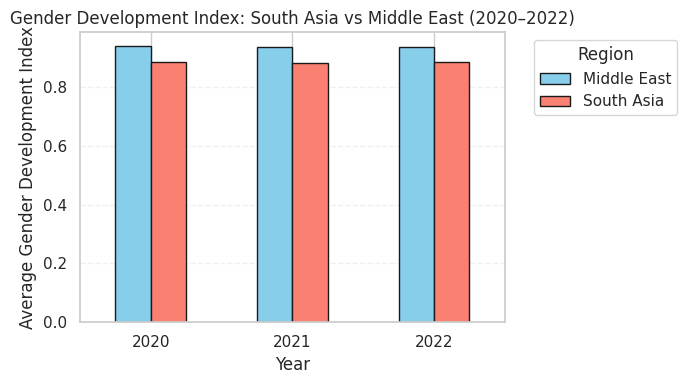

In [71]:
# -----------------------------
# Task 4: Metric Comparisons
# -----------------------------
#  Add region column if missing
if "region" not in hdi_southasia_2020_2022.columns:
    hdi_southasia_2020_2022 = hdi_southasia_2020_2022.copy()
    hdi_southasia_2020_2022["region"] = "South Asia"

if "region" not in hdi_middleeast_2020_2022.columns:
    hdi_middleeast_2020_2022 = hdi_middleeast_2020_2022.copy()
    hdi_middleeast_2020_2022["region"] = "Middle East"

#  Combine both regions into one dataframe
hdi_regions = pd.concat([hdi_southasia_2020_2022, hdi_middleeast_2020_2022], ignore_index=True)

# Now group
gdi_avg = (
    hdi_regions
    .groupby(["region", "year"])["gender_development"]
    .mean()
    .reset_index()
)

display(gdi_avg)
gdi_pivot = gdi_avg.pivot(index="year", columns="region", values="gender_development")
display(gdi_pivot)

ax = gdi_pivot.plot(
    kind='bar',
    figsize=(7,4),
    color=['skyblue','salmon'],
    edgecolor='k'
)

# Titles and labels
ax.set_title("Gender Development Index: South Asia vs Middle East (2020–2022)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Gender Development Index")

# Grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Legend outside plot
ax.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



,region,year,life_expectancy
0,Middle East,2020,76.18025
1,Middle East,2021,76.19075
2,Middle East,2022,77.20700
3,South Asia,2020,70.80520
4,South Asia,2021,70.11360
5,South Asia,2022,70.99340


region,Middle East,South Asia
year,,
2020,76.18025,70.8052
2021,76.19075,70.1136
2022,77.20700,70.9934


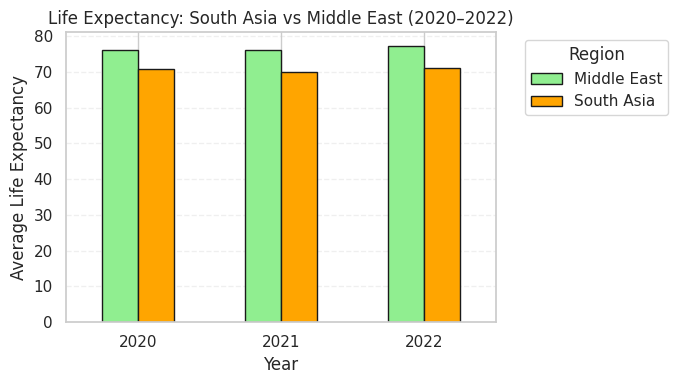

In [73]:
#– Life Expectancy Index {"life expectancy"}
le_avg = (
    hdi_regions
    .groupby(["region", "year"])["life_expectancy"]
    .mean()
    .reset_index()
)

display(le_avg)

le_pivot = le_avg.pivot(index="year", columns="region", values="life_expectancy")
display(le_pivot)

#Plot grouped bar chart(life_expentency)
ax = le_pivot.plot(
    kind='bar',
    figsize=(7,4),
    color=['lightgreen','orange'],
    edgecolor='k'
)

# Titles and labels
ax.set_title("Life Expectancy: South Asia vs Middle East (2020–2022)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Life Expectancy")

# Grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Legend outside
ax.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


,region,year,gross_inc_percap
0,Middle East,2020,43055.645912
1,Middle East,2021,44755.061640
2,Middle East,2022,47185.407731
3,South Asia,2020,6643.953771
4,South Asia,2021,6952.237585
5,South Asia,2022,6952.194511


region,Middle East,South Asia
year,,
2020,43055.645912,6643.953771
2021,44755.061640,6952.237585
2022,47185.407731,6952.194511


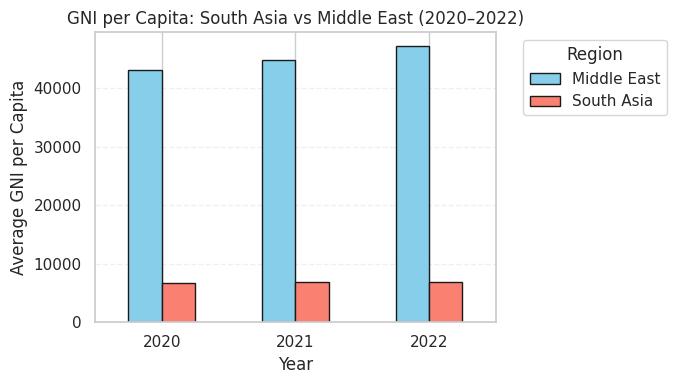

In [75]:
#– GNI per Capita Index {"gross inc percap"}
#Group
gni_avg = (
    hdi_regions
    .groupby(["region", "year"])["gross_inc_percap"]
    .mean()
    .reset_index()
)

display(gni_avg)

#Pivot
gni_pivot = gni_avg.pivot(index="year", columns="region", values="gross_inc_percap")
display(gni_pivot)

#Plot grouped bar chart(gross inc percap)
ax = gni_pivot.plot(
    kind='bar',
    figsize=(7,4),
    color=['skyblue','salmon'],
    edgecolor='k'
)

# Titles and labels
ax.set_title("GNI per Capita: South Asia vs Middle East (2020–2022)")
ax.set_xlabel("Year")
ax.set_ylabel("Average GNI per Capita")

# Grid and ticks
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Legend outside
ax.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



Compute HDI range (max - min) for each region

In [76]:
#Task 5
# Compute HDI range (max - min) for each region
hdi_range = (
    hdi_regions
    .groupby("region")["hdi"]
    .agg(["max", "min"])
)

hdi_range["HDI_Range"] = hdi_range["max"] - hdi_range["min"]

display(hdi_range[["HDI_Range"]])


,HDI_Range
region,
Middle East,0.276
South Asia,0.247


Compute coefficient of variation (CV) for HDI by region

In [77]:
# Compute coefficient of variation (CV) for HDI by region
hdi_cv = (
    hdi_regions
    .groupby("region")["hdi"]
    .agg(["mean", "std"])
)

hdi_cv["CV"] = hdi_cv["std"] / hdi_cv["mean"]

display(hdi_cv[["CV"]])

,CV
region,
Middle East,0.099538
South Asia,0.130158


In [78]:
#Task 6: Correlation Analysis
# -----------------------------
# HDI vs Gender Development Index: Correlation by Region
# -----------------------------

# South Asia
sa_metrics = hdi_southasia_2020_2022[["hdi", "gender_development"]].dropna()
sa_corr = sa_metrics["hdi"].corr(sa_metrics["gender_development"])

# Middle East
me_metrics = hdi_middleeast_2020_2022[["hdi", "gender_development"]].dropna()
me_corr = me_metrics["hdi"].corr(me_metrics["gender_development"])

# Display results
print("Pearson Correlation between HDI and Gender Development Index:")
print(f" - South Asia: {sa_corr:.3f}")
print(f" - Middle East: {me_corr:.3f}")


Pearson Correlation between HDI and Gender Development Index:
 - South Asia: 0.868
 - Middle East: 0.821


In [79]:
# -----------------------------
# HDI vs Life Expectancy: Correlation by Region
# -----------------------------

# South Asia
sa_metrics = hdi_southasia_2020_2022[["hdi", "life_expectancy"]].dropna()
sa_le_corr = sa_metrics["hdi"].corr(sa_metrics["life_expectancy"])

# Middle East
me_metrics = hdi_middleeast_2020_2022[["hdi", "life_expectancy"]].dropna()
me_le_corr = me_metrics["hdi"].corr(me_metrics["life_expectancy"])

# Display results
print("Pearson Correlation between HDI and Life Expectancy:")
print(f" - South Asia: {sa_le_corr:.3f}")
print(f" - Middle East: {me_le_corr:.3f}")


Pearson Correlation between HDI and Life Expectancy:
 - South Asia: 0.933
 - Middle East: 0.866


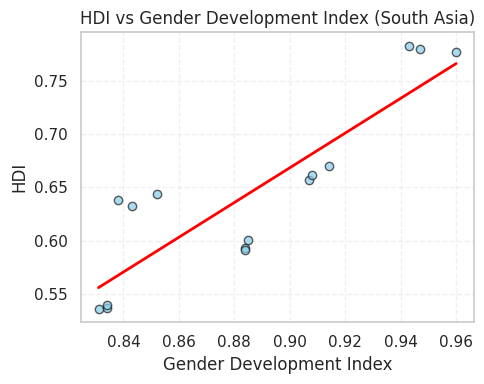

In [80]:
#scatter plots with trendlines for each correlation.
#SOUTH ASIA
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Scatter plot: HDI vs Gender Development Index (South Asia)
# -----------------------------

sa_metrics = hdi_southasia_2020_2022[["hdi","gender_development"]].dropna()

plt.figure(figsize=(5,4))

# Scatter points
plt.scatter(sa_metrics["gender_development"], sa_metrics["hdi"], color='skyblue', alpha=0.7, edgecolor='k')

# Linear trendline
slope, intercept = np.polyfit(sa_metrics["gender_development"], sa_metrics["hdi"], 1)
x_vals = np.linspace(sa_metrics["gender_development"].min(), sa_metrics["gender_development"].max(), 100)
plt.plot(x_vals, slope*x_vals + intercept, color='red', linewidth=2)

# Labels, title, grid
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


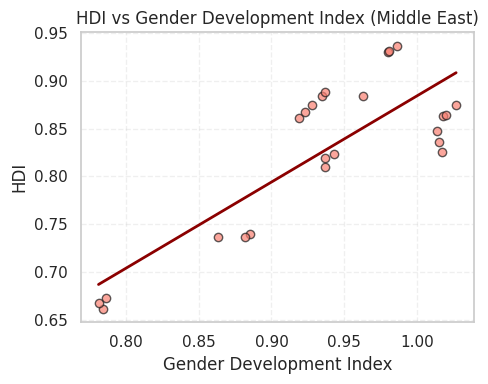

In [81]:
#MIDDLE EAST
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Scatter plot: HDI vs Gender Development Index (Middle East)
# -----------------------------

me_metrics = hdi_middleeast_2020_2022[["hdi","gender_development"]].dropna()

plt.figure(figsize=(5,4))

# Scatter points
plt.scatter(me_metrics["gender_development"], me_metrics["hdi"], color='salmon', alpha=0.7, edgecolor='k')

# Linear trendline
slope, intercept = np.polyfit(me_metrics["gender_development"], me_metrics["hdi"], 1)
x_vals = np.linspace(me_metrics["gender_development"].min(), me_metrics["gender_development"].max(), 100)
plt.plot(x_vals, slope*x_vals + intercept, color='darkred', linewidth=2)

# Labels, title, grid
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (Middle East)")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


HDI vs Life Expectancy

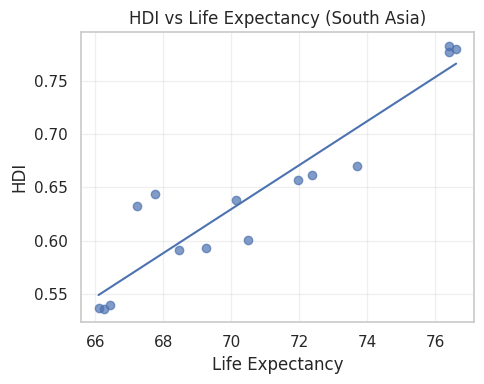

In [82]:
#SOUTH ASIA
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_southasia_2020_2022["life_expectancy"],
    hdi_southasia_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_southasia_2020_2022["life_expectancy"],
    hdi_southasia_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_southasia_2020_2022["life_expectancy"].min(),
    hdi_southasia_2020_2022["life_expectancy"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


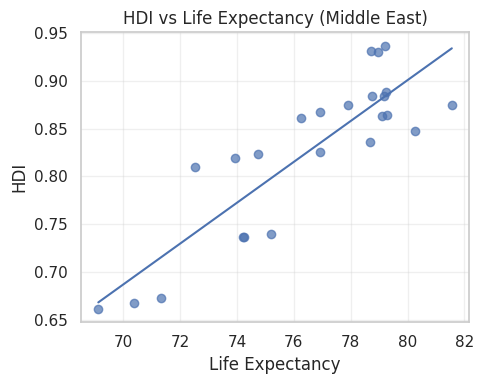

In [83]:
#MIDDLE EAST
plt.figure(figsize=(5,4))
plt.scatter(
    hdi_middleeast_2020_2022["life_expectancy"],
    hdi_middleeast_2020_2022["hdi"],
    alpha=0.7
)

# Trendline
m, b = np.polyfit(
    hdi_middleeast_2020_2022["life_expectancy"],
    hdi_middleeast_2020_2022["hdi"],
    1
)
x = np.linspace(
    hdi_middleeast_2020_2022["life_expectancy"].min(),
    hdi_middleeast_2020_2022["life_expectancy"].max(),
    100
)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (Middle East)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [84]:
#Task 7: Outlier Detection
#Outlier Detection Function
# Function to detect outliers using 1.5 × IQR rule
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [85]:
#South Asia Outliers
# South Asia HDI outliers
sa_hdi_outliers = detect_outliers_iqr(
    hdi_southasia_2020_2022["hdi"]
)

# South Asia GNI per Capita outliers
sa_gni_outliers = detect_outliers_iqr(
    hdi_southasia_2020_2022["gross_inc_percap"]
)

print("South Asia HDI Outliers:")
display(hdi_southasia_2020_2022.loc[sa_hdi_outliers.index, ["country", "year", "hdi"]])

print("South Asia GNI per Capita Outliers:")
display(hdi_southasia_2020_2022.loc[sa_gni_outliers.index, ["country", "year", "gross_inc_percap"]])

South Asia HDI Outliers:


,country,year,hdi
5476,Sri Lanka,2021,0.783
5477,Sri Lanka,2022,0.780


South Asia GNI per Capita Outliers:


,country,year,gross_inc_percap
5475,Sri Lanka,2020,12589.80645
5476,Sri Lanka,2021,12958.82226
5477,Sri Lanka,2022,11899.49847


In [86]:
#Middle East Outliers
# Middle East HDI outliers
me_hdi_outliers = detect_outliers_iqr(
    hdi_middleeast_2020_2022["hdi"]
)

# Middle East GNI per Capita outliers
me_gni_outliers = detect_outliers_iqr(
    hdi_middleeast_2020_2022["gross_inc_percap"]
)

print("Middle East HDI Outliers:")
display(hdi_middleeast_2020_2022.loc[me_hdi_outliers.index, ["country", "year", "hdi"]])

print("Middle East GNI per Capita Outliers:")
display(hdi_middleeast_2020_2022.loc[me_gni_outliers.index, ["country", "year", "gross_inc_percap"]])

Middle East HDI Outliers:


,country,year,hdi
2670,Iraq,2020,0.661


Middle East GNI per Capita Outliers:


,country,year,gross_inc_percap


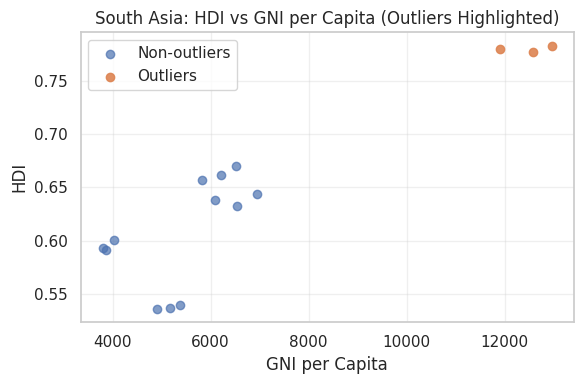

In [87]:
#South Asia scatter plot with outliers
#function define
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

sa = hdi_southasia_2020_2022.copy()

# Compute IQR bounds
hdi_lb, hdi_ub = iqr_bounds(sa["hdi"])
gni_lb, gni_ub = iqr_bounds(sa["gross_inc_percap"])

# Identify outliers
sa["Outlier"] = (
    (sa["hdi"] < hdi_lb) | (sa["hdi"] > hdi_ub) |
    (sa["gross_inc_percap"] < gni_lb) | (sa["gross_inc_percap"] > gni_ub)
)

plt.figure(figsize=(6,4))
plt.scatter(
    sa.loc[~sa["Outlier"], "gross_inc_percap"],
    sa.loc[~sa["Outlier"], "hdi"],
    label="Non-outliers",
    alpha=0.7
)
plt.scatter(
    sa.loc[sa["Outlier"], "gross_inc_percap"],
    sa.loc[sa["Outlier"], "hdi"],
    label="Outliers",
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

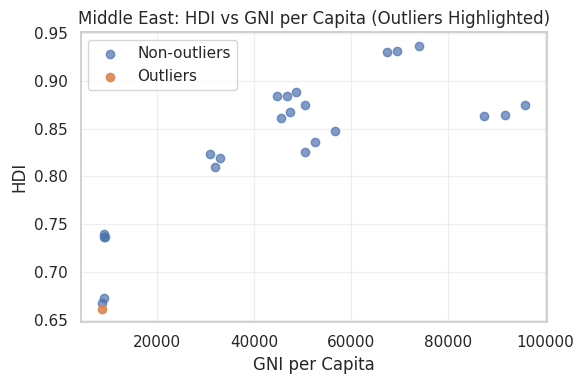

In [88]:
#Middle East scatter plot with outliers
me = hdi_middleeast_2020_2022.copy()

# Compute IQR bounds
hdi_lb, hdi_ub = iqr_bounds(me["hdi"])
gni_lb, gni_ub = iqr_bounds(me["gross_inc_percap"])

# Identify outliers
me["Outlier"] = (
    (me["hdi"] < hdi_lb) | (me["hdi"] > hdi_ub) |
    (me["gross_inc_percap"] < gni_lb) | (me["gross_inc_percap"] > gni_ub)
)

plt.figure(figsize=(6,4))
plt.scatter(
    me.loc[~me["Outlier"], "gross_inc_percap"],
    me.loc[~me["Outlier"], "hdi"],
    label="Non-outliers",
    alpha=0.7
)
plt.scatter(
    me.loc[me["Outlier"], "gross_inc_percap"],
    me.loc[me["Outlier"], "hdi"],
    label="Outliers",
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()